Decision Tree Classifier:
Train Accuracy: 1.0
Test Accuracy : 1.0

Decision Tree Regressor:
Train RMSE: 0.03227486121839513
Test RMSE : 0.43040678433314694


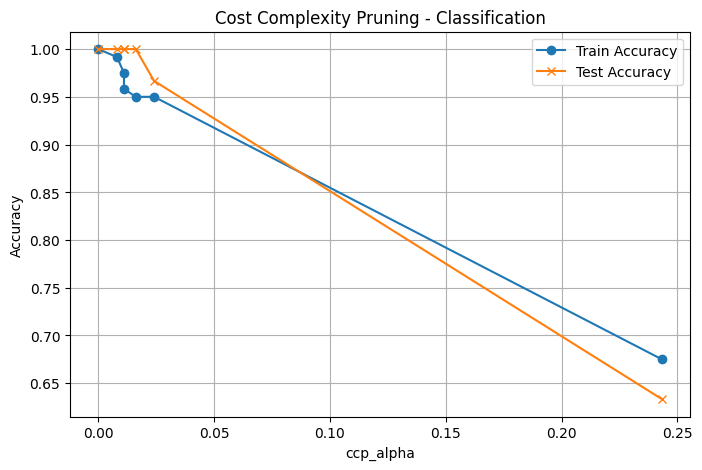


Random Forest Classifier:
Train Accuracy: 1.0
Test Accuracy : 1.0

AdaBoost Classifier (Decision Stumps):
Train Accuracy: 1.0
Test Accuracy : 0.9333333333333333


In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# 2. Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_class = iris.target  # for classification
y_reg = X['petal length (cm)']  # for regression

# 3. Split Data
# Classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Regression (remove petal length column from features)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X.drop(columns='petal length (cm)'), y_reg, test_size=0.2, random_state=42)

# 4. Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)

y_pred_train_c = clf.predict(X_train_c)
y_pred_test_c = clf.predict(X_test_c)

print("Decision Tree Classifier:")
print("Train Accuracy:", accuracy_score(y_train_c, y_pred_train_c))
print("Test Accuracy :", accuracy_score(y_test_c, y_pred_test_c))

# 5. Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)

y_pred_train_r = reg.predict(X_train_r)
y_pred_test_r = reg.predict(X_test_r)

print("\nDecision Tree Regressor:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_r, y_pred_train_r)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test_r, y_pred_test_r)))


# 6. Cost Complexity Pruning (Classification)
path = clf.cost_complexity_pruning_path(X_train_c, y_train_c)
ccp_alphas = path.ccp_alphas[:-1]

train_scores = []
test_scores = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train_c, y_train_c)
    train_scores.append(pruned_tree.score(X_train_c, y_train_c))
    test_scores.append(pruned_tree.score(X_test_c, y_test_c))

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='x', label='Test Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Cost Complexity Pruning - Classification")
plt.legend()
plt.grid(True)
plt.show()

# 7. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_c, y_train_c)

print("\nRandom Forest Classifier:")
print("Train Accuracy:", rf.score(X_train_c, y_train_c))
print("Test Accuracy :", rf.score(X_test_c, y_test_c))

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # pass directly as first argument
    n_estimators=50,
    random_state=42
)


ada.fit(X_train_c, y_train_c)

print("\nAdaBoost Classifier (Decision Stumps):")
print("Train Accuracy:", ada.score(X_train_c, y_train_c))
print("Test Accuracy :", ada.score(X_test_c, y_test_c))
